<a href="https://colab.research.google.com/github/douglasbarbosadelima/Data-Science/blob/master/pooling_inv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==2.0.0 #com GPU

     |████████████████████████████████| 380.8MB 42kB/s 
     |████████████████████████████████| 450kB 41.1MB/s 
     |████████████████████████████████| 3.8MB 52.5MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [2]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
tf.random.set_seed(42)
print(tf.__version__)

2.0.0


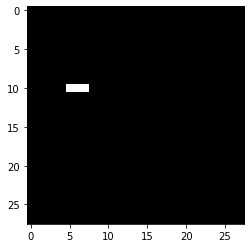

In [3]:
#imagem 28x28 com valores apenas uma reta
img0=np.zeros((28,28))
img1=np.zeros((28,28))
img0[10,5:8]=255
img1[10,6:9]=255
kernel=np.array([[0,1,0],[0,1,0],[0,1,0]])
plt.gray()
plt.imshow(img0)

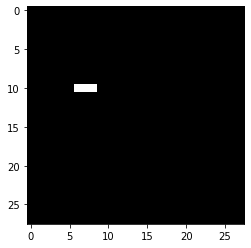

In [4]:
plt.gray()
plt.imshow(img1)

In [0]:
def conv(m,k):
  return (m*k).sum()

In [6]:
m,n=img0.shape
mk,nk=kernel.shape
img_conv0=np.zeros((m-mk+1,n-nk+1))
img_conv1=np.zeros((m-mk+1,n-nk+1))
img_conv0.shape

(26, 26)

In [7]:
mc,nc=img_conv0.shape
for i in range(mc):
  for j in range(nc):
    img_conv0[i,j]=conv(img0[i:i+3,j:j+3],kernel)
img_conv0

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  

In [8]:
mc,nc=img_conv1.shape
for i in range(mc):
  for j in range(nc):
    img_conv1[i,j]=conv(img1[i:i+3,j:j+3],kernel)
img_conv1

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  

Aplique Relu+Pooling após as convoluções em img0 e img1. Compare os resultados.

In [0]:
def max_pool(M):
  m,n = M.shape
  M = M.reshape((m*n, ))
  return M.max()

In [0]:
mc,nc=img_conv0.shape
mpool,npool=2,2 #pooling size, stride 2
pooled0=np.zeros((mc//mpool, nc//npool))
pooled1=np.zeros((mc//mpool, nc//npool))
pl,pc=pooled0.shape

In [0]:
for i in range(pl):
  for j in range(pc):
    pooled0[i,j]=max_pool(img_conv0[mpool * i : mpool * i + 2, npool * j : npool * j + 2])
    pooled1[i,j]=max_pool(img_conv1[mpool * i : mpool * i + 2, npool * j : npool * j + 2])

In [18]:
pooled0

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.],
       [  0.,   0., 255., 255.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.],
       [  0.,   0., 255., 255.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0., 

In [19]:
pooled1

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.],
       [  0.,   0., 255., 255.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.],
       [  0.,   0., 255., 255.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0., 